## Testing code for CVC and residual volume analysis

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from skimage.io import imread

from chromemt_analysis import segment_like_paper, continuous_erosion_edt, linear_fit_to_residual_volume, linear_fit_to_residual_volume2 

In [2]:
# fig. 4 EMT volume
img = imread('/Volumes/davidh-ssd/chromemt_data/49801.tif')

# rough location of first patch
cut_siz = 94 # 94px ~ 120nm at 1.28nm pixel size
off = 0, 140, 40

cut = img[tuple((slice(o, o+cut_siz) for o in off))]

(18.15578570833727, 17.832069975151242)

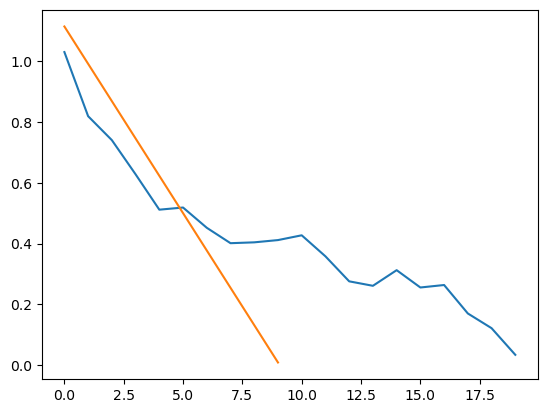

In [3]:
# test linear fit (compare xy fit and yx fit (function2))
rv_test = np.concatenate([np.linspace(1,0.5,5),np.linspace(0.5, 0.1, 15)] ) + np.random.randn(20) / 20
r, mod = linear_fit_to_residual_volume(rv_test)
r2, mod2 = linear_fit_to_residual_volume2(rv_test)

# plot trace, fitted model line
plt.plot(rv_test)
plt.plot(np.arange(r // 2 + 1), mod.predict(np.arange(r // 2 + 1).reshape(-1,1)))

r, r2

In [7]:
mask = segment_like_paper(cut)
erosion_radius=np.arange(1, 15)
residual_vol = continuous_erosion_edt(mask, erosion_radius)

residual_vol

array([7.75668237e-01, 5.56823047e-01, 3.26900728e-01, 1.98244541e-01,
       9.49660530e-02, 4.46724570e-02, 2.12765307e-02, 9.70701572e-03,
       3.85038840e-03, 1.26919078e-03, 2.04905499e-04, 3.05829103e-06,
       0.00000000e+00, 0.00000000e+00])

13.329536993750512

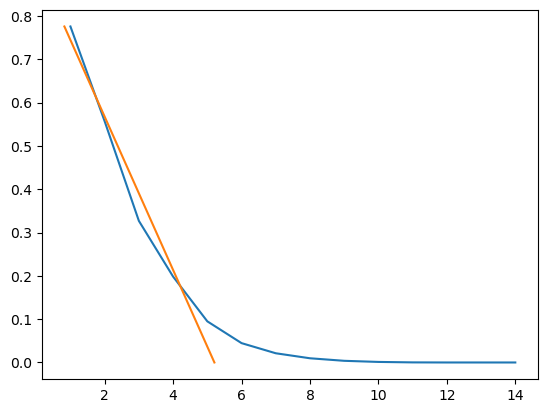

In [9]:
d, mod = linear_fit_to_residual_volume2(residual_vol, erosion_radius)

# plot residual volume fraction
plt.plot(erosion_radius, residual_vol)
# plot fitted line
plt.plot(mod.predict(np.linspace(residual_vol[0],0).reshape(-1,1)), np.linspace(residual_vol[0],0).reshape(-1,1))

# diameter in nm
d * 1.28

0.39367481193955095

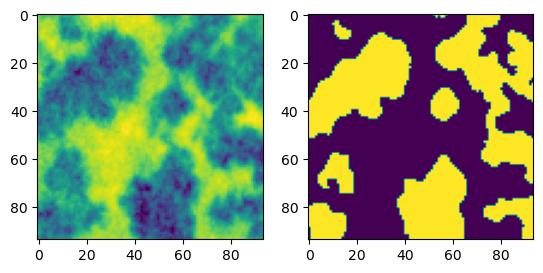

In [13]:
fig, axs = plt.subplots(ncols=2)
axs[0].imshow(cut[0])
axs[1].imshow(segment_like_paper(cut)[0])

# chromatin volume fraction
segment_like_paper(cut).sum() / np.prod(cut.shape)